# Usage (quick version)
This is a quick tour of CovsirPhy. Details of datasets and scenario analysis will be explained.

## Preparation
Prepare the packages.

In [1]:
# Standard users
# !pip install covsirphy

In [2]:
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [3]:
import covsirphy as cs
cs.__version__

'2.13.0-alpha.fix.417'

## Dataset preparation
Download the datasets to "input" direcotry and load them.

In [4]:
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=True)
# Population in each country
population_data = data_loader.population(verbose=True)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=True)

### Scenario analysis
As an example, we will analysis the number of cases in Japan.

In [5]:
snl = cs.Scenario(jhu_data, population_data, country="Japan", province=None)

### Check records
Let's see the records at first. `Scenario.records()` method return the records as a pandas dataframe and show a line plot.

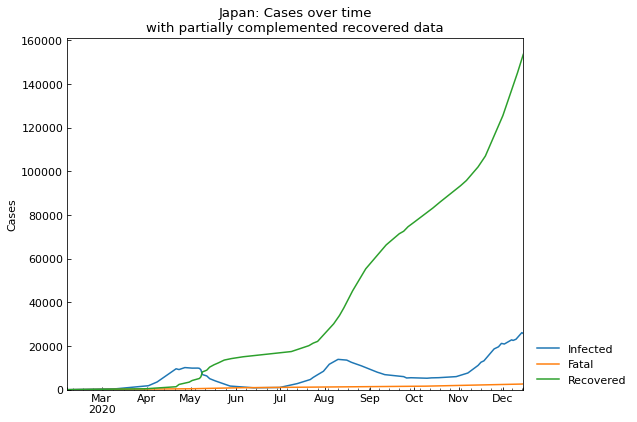

,Date,Confirmed,Infected,Fatal,Recovered
309,2020-12-11,171542,24026,2502,145014
310,2020-12-12,174299,24241,2534,147524
311,2020-12-13,177287,25439,2562,149286
312,2020-12-14,179653,26121,2585,150947
313,2020-12-15,181870,25708,2643,153519


In [6]:
record_df = snl.records()
record_df.tail()

We can calculate the number of new cases with `Scenario.record_diff()` method.

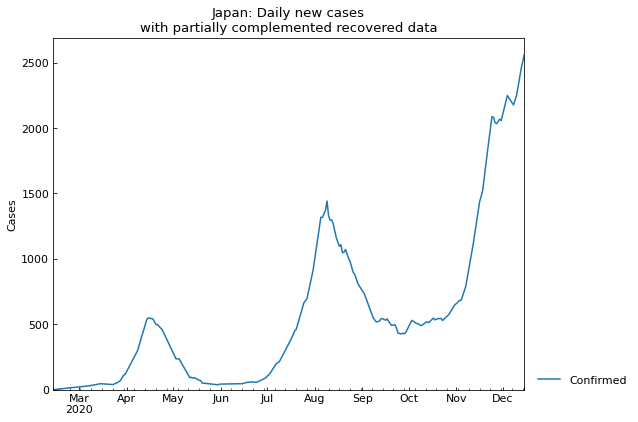

In [7]:
_ = snl.records_diff(variables=["Confirmed"], window=7)

### S-R trend analysis
S-R trend analysis finds the change points of SIR-derived ODE parameters. Details will be explained in [Usage (details: phases)](https://lisphilar.github.io/covid19-sir/usage_phases.html).

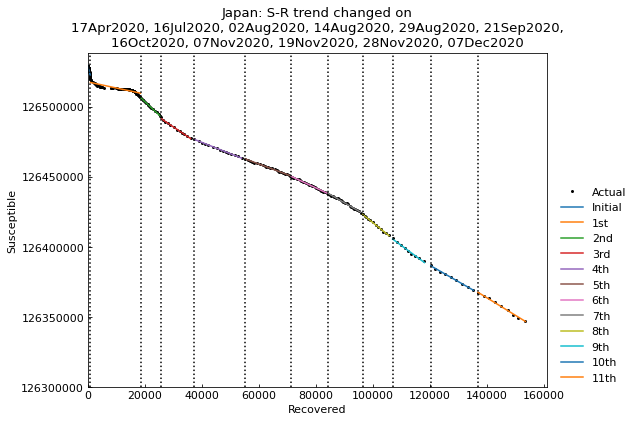

,Type,Start,End,Population
0th,Past,06Feb2020,16Apr2020,126529100
1st,Past,17Apr2020,15Jul2020,126529100
2nd,Past,16Jul2020,01Aug2020,126529100
3rd,Past,02Aug2020,13Aug2020,126529100
4th,Past,14Aug2020,28Aug2020,126529100
5th,Past,29Aug2020,20Sep2020,126529100
6th,Past,21Sep2020,15Oct2020,126529100
7th,Past,16Oct2020,06Nov2020,126529100
8th,Past,07Nov2020,18Nov2020,126529100
9th,Past,19Nov2020,27Nov2020,126529100


In [8]:
# Perform S-R trend analysis and set phases
snl.trend(set_phases=True)
snl.summary()

### Hyperparameter estimation of ODE models
Here, we will estimate the parameter values of SIR-derived models. As an example, we use SIR-F model. Details of models will be explained in [Usage (details: theoritical datasets)](https://lisphilar.github.io/covid19-sir/usage_theoretical.html).

In [9]:
# Estimate the parameter values of SIR-F model
snl.estimate(cs.SIRF)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	 2nd phase (07Nov2020 - 18Nov2020): finished 2751 trials in 3 min  0 sec


	10th phase (02Aug2020 - 13Aug2020): finished 2778 trials in 3 min  0 sec

	 0th phase (06Feb2020 - 16Apr2020): finished 2755 trials in 3 min  0 sec

	 6th phase (17Apr2020 - 15Jul2020): finished 2723 trials in 3 min  1 sec

	 4th phase (19Nov2020 - 27Nov2020): finished 2784 trials in 3 min  0 sec

	 7th phase (07Dec2020 - 15Dec2020): finished  348 trials in 0 min 10 sec

	 3rd phase (28Nov2020 - 06Dec2020): finished  352 trials in 0 min 10 sec

	 1st phase (14Aug2020 - 28Aug2020): finished  354 trials in 0 min 10 sec

	 8th phase (29Aug2020 - 20Sep2020): finished  352 trials in 0 min 10 sec

	 5th phase (16Jul2020 - 01Aug2020): finished  350 trials in 0 min 10 sec

	 9th phase (21Sep2020 - 15Oct2020): finished  674 trials in 0 min 20 sec

	11th phase (16Oct2020 - 06Nov2020): finished 3567 trials in 3 min  0 sec

Completed optimization. Total: 9 min  4 sec


In [10]:
# Show the sumamry of parameter estimation
snl.summary()

,Type,Start,End,Population,ODE,Rt,theta,kappa,rho,sigma,tau,1/beta [day],1/alpha2 [day],1/gamma [day],alpha1 [-],RMSLE,Trials,Runtime
0th,Past,06Feb2020,16Apr2020,126529100,SIR-F,4.80,0.021315,0.000112,0.103006,0.020872,1440,9,8903,47,0.021,0.257967,2755,3 min 0 sec
1st,Past,17Apr2020,15Jul2020,126529100,SIR-F,0.53,0.080691,0.000663,0.031904,0.054611,1440,31,1508,18,0.081,0.354081,2723,3 min 1 sec
2nd,Past,16Jul2020,01Aug2020,126529100,SIR-F,1.99,0.000432,0.000098,0.140787,0.070585,1440,7,10197,14,0.000,0.025632,350,0 min 10 sec
3rd,Past,02Aug2020,13Aug2020,126529100,SIR-F,1.62,0.000208,0.000280,0.105233,0.064798,1440,9,3569,15,0.000,0.040060,2778,3 min 0 sec
4th,Past,14Aug2020,28Aug2020,126529100,SIR-F,0.76,0.001183,0.000945,0.076978,0.099679,1440,12,1057,10,0.001,0.034487,354,0 min 10 sec
5th,Past,29Aug2020,20Sep2020,126529100,SIR-F,0.76,0.000196,0.001444,0.076137,0.098509,1440,13,692,10,0.000,0.017391,352,0 min 10 sec
6th,Past,21Sep2020,15Oct2020,126529100,SIR-F,0.92,0.000830,0.000930,0.096578,0.103445,1440,10,1075,9,0.001,0.030606,674,0 min 20 sec
7th,Past,16Oct2020,06Nov2020,126529100,SIR-F,1.09,0.000260,0.001282,0.118419,0.106840,1440,8,780,9,0.000,0.033210,3567,3 min 0 sec
8th,Past,07Nov2020,18Nov2020,126529100,SIR-F,1.59,0.001183,0.000857,0.140835,0.087562,1440,7,1167,11,0.001,0.010202,2751,3 min 0 sec
9th,Past,19Nov2020,27Nov2020,126529100,SIR-F,1.56,0.000629,0.000886,0.129866,0.082304,1440,7,1128,12,0.001,0.022821,2784,3 min 0 sec


### Accuracy of estimation

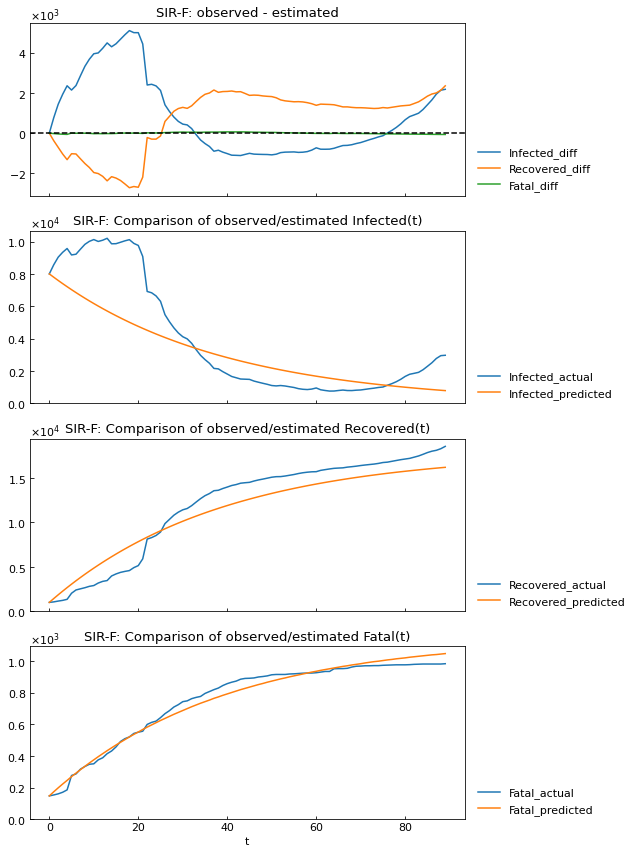

In [11]:
snl.estimate_accuracy(phase="1st")

### Get parameter value

In [12]:
snl.get("Rt", phase="4th")

0.76

### Show parameter history

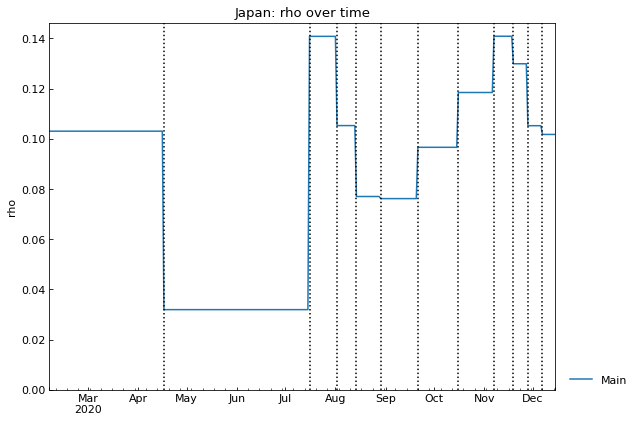

In [13]:
_ = snl.history(target="rho")

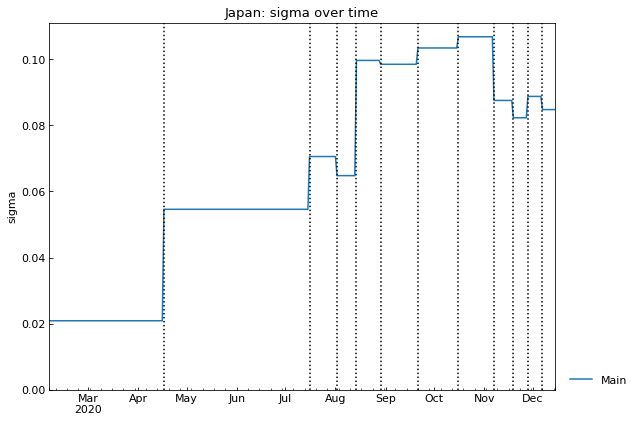

In [14]:
_ = snl.history(target="sigma")

### Show the history of reproduction number

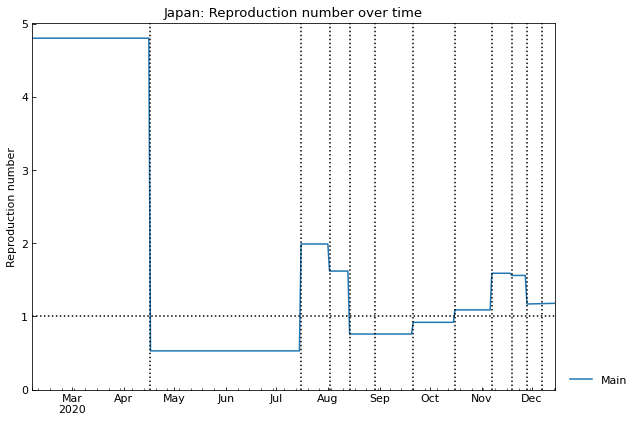

In [15]:
_ = snl.history(target="Rt")

### Simulate the number of cases

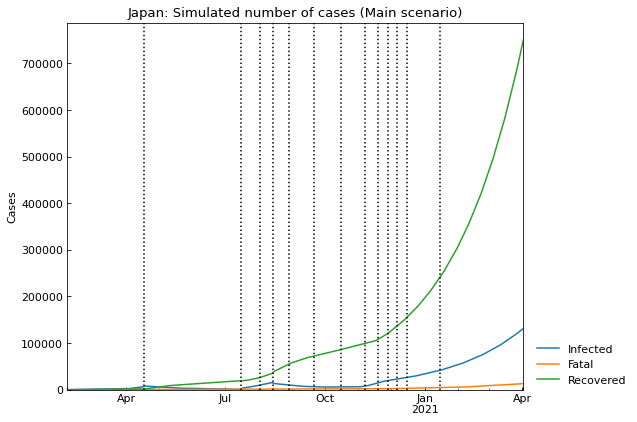

,Date,Confirmed,Fatal,Infected,Recovered
417,2021-03-29,842952,12338,123783,706831
418,2021-03-30,855550,12523,125621,717406
419,2021-03-31,868336,12712,127486,728138
420,2021-04-01,881307,12903,129376,739028
421,2021-04-02,894470,13096,131294,750080


In [16]:
snl.clear(name="Main")
snl.add(days=30)
snl.add(end_date="01Apr2021", name="Main")
main_sim_df = snl.simulate(name="Main")
main_sim_df.tail()

### Simulate another scenario
If $\sigma$ will be double in 30 days, how many cases will be?

In [17]:
sigma_current = snl.get("sigma", name="Main", phase="last")
sigma_current

0.08479667883941366

In [18]:
sigma_new = sigma_current * 2
sigma_new

0.16959335767882733

In [19]:
snl.clear(name="Medicine")
snl.add(name="Medicine", days=30, sigma=sigma_current)
snl.add(name="Medicine", end_date="01Apr2021", sigma=sigma_new)
snl.summary()

Type      Start        End  Population    ODE    Rt  \
Scenario Phase                                                          
Main     0th      Past  06Feb2020  16Apr2020   126529100  SIR-F  4.80   
         1st      Past  17Apr2020  15Jul2020   126529100  SIR-F  0.53   
         2nd      Past  16Jul2020  01Aug2020   126529100  SIR-F  1.99   
         3rd      Past  02Aug2020  13Aug2020   126529100  SIR-F  1.62   
         4th      Past  14Aug2020  28Aug2020   126529100  SIR-F  0.76   
         5th      Past  29Aug2020  20Sep2020   126529100  SIR-F  0.76   
         6th      Past  21Sep2020  15Oct2020   126529100  SIR-F  0.92   
         7th      Past  16Oct2020  06Nov2020   126529100  SIR-F  1.09   
         8th      Past  07Nov2020  18Nov2020   126529100  SIR-F  1.59   
         9th      Past  19Nov2020  27Nov2020   126529100  SIR-F  1.56   
         10th     Past  28Nov2020  06Dec2020   126529100  SIR-F  1.17   
         11th     Past  07Dec2020  15Dec2020   126529100  SIR-F  1.18   
         12th   Future  16Dec2020  14Jan2021   126529100  SIR-F  1.18   
         13th   Future  15Jan2021  01Apr2021   126529100  SIR-F  1.18   
Medicine 0th      Past  06Feb2020  16Apr2020   126529100  SIR-F  4.80   
         1st      Past  17Apr2020  15Jul2020   126529100  SIR-F  0.53   
         2nd      Past  16Jul2020  01Aug2020   126529100  SIR-F  1.99   
         3rd      Past  02Aug2020  13Aug2020   126529100  SIR-F  1.62   
         4th      Past  14Aug2020  28Aug2020   126529100  SIR-F  0.76   
         5th      Past  29Aug2020  20Sep2020   126529100  SIR-F  0.76   
         6th      Past  21Sep2020  15Oct2020   126529100  SIR-F  0.92   
         7th      Past  16Oct2020  06Nov2020   126529100  SIR-F  1.09   
         8th      Past  07Nov2020  18Nov2020   126529100  SIR-F  1.59   
         9th      Past  19Nov2020  27Nov2020   126529100  SIR-F  1.56   
         10th     Past  28Nov2020  06Dec2020   126529100  SIR-F  1.17   
         11th     Past  07Dec2020  15Dec2020   126529100  SIR-F  1.18   
         12th   Future  16Dec2020  14Jan2021   126529100  SIR-F  1.18   
         13th   Future  15Jan2021  01Apr2021   126529100  SIR-F  0.59   

                   theta     kappa       rho     sigma   tau  1/beta [day]  \
Scenario Phase                                                               
Main     0th    0.021315  0.000112  0.103006  0.020872  1440             9   
         1st    0.080691  0.000663  0.031904  0.054611  1440            31   
         2nd    0.000432  0.000098  0.140787  0.070585  1440             7   
         3rd    0.000208  0.000280  0.105233  0.064798  1440             9   
         4th    0.001183  0.000945  0.076978  0.099679  1440            12   
         5th    0.000196  0.001444  0.076137  0.098509  1440            13   
         6th    0.000830  0.000930  0.096578  0.103445  1440            10   
         7th    0.000260  0.001282  0.118419  0.106840  1440             8   
         8th    0.001183  0.000857  0.140835  0.087562  1440             7   
         9th    0.000629  0.000886  0.129866  0.082304  1440             7   
         10th   0.000625  0.001127  0.105186  0.088782  1440             9   
         11th   0.004122  0.001071  0.101709  0.084797  1440             9   
         12th   0.004122  0.001071  0.101709  0.084797  1440             9   
         13th   0.004122  0.001071  0.101709  0.084797  1440             9   
Medicine 0th    0.021315  0.000112  0.103006  0.020872  1440             9   
         1st    0.080691  0.000663  0.031904  0.054611  1440            31   
         2nd    0.000432  0.000098  0.140787  0.070585  1440             7   
         3rd    0.000208  0.000280  0.105233  0.064798  1440             9   
         4th    0.001183  0.000945  0.076978  0.099679  1440            12   
         5th    0.000196  0.001444  0.076137  0.098509  1440            13   
         6th    0.000830  0.000930  0.096578  0.103445  1440            10   
         7th    0.000260  0.00128

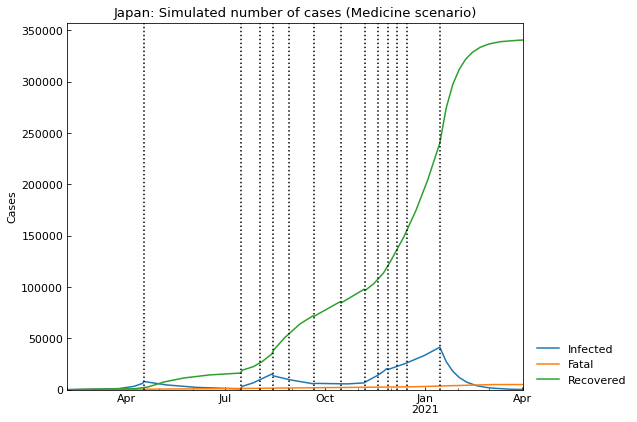

,Date,Confirmed,Fatal,Infected,Recovered
417,2021-03-29,345521,5026,258,340237
418,2021-03-30,345547,5027,241,340279
419,2021-03-31,345571,5027,225,340319
420,2021-04-01,345591,5027,209,340355
421,2021-04-02,345613,5028,195,340390


In [20]:
snl.simulate(name="Medicine").tail()

### Compare the scenarios
We will compare the scenarios with representative values, reproduction number and parameter values.

In [21]:
snl.describe()

,max(Infected),argmax(Infected),Confirmed on 02Apr2021,Infected on 02Apr2021,Fatal on 02Apr2021,13th_Rt
Main,131294,02Apr2021,894470,131294,13096,1.18
Medicine,41377,15Jan2021,345613,195,5028,0.59


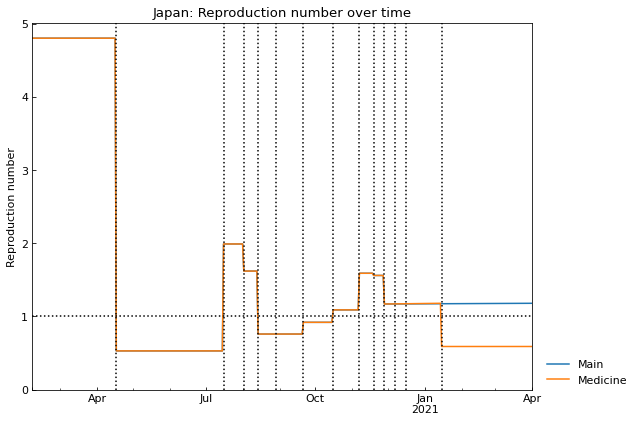

In [22]:
_ = snl.history(target="Rt")

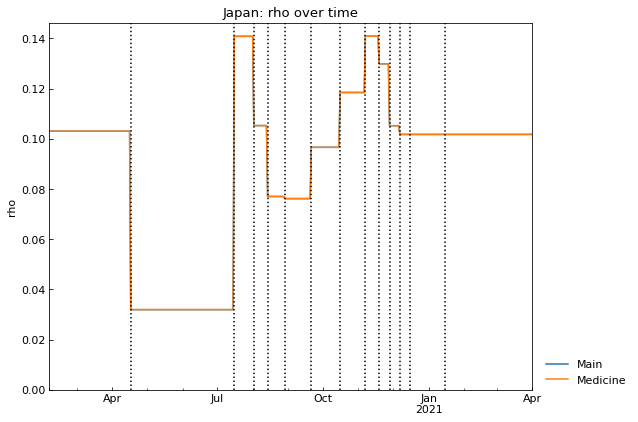

In [23]:
_ = snl.history(target="rho")

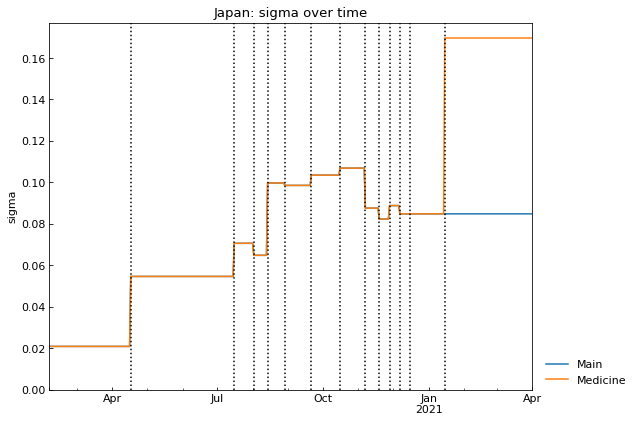

In [24]:
_ = snl.history(target="sigma")

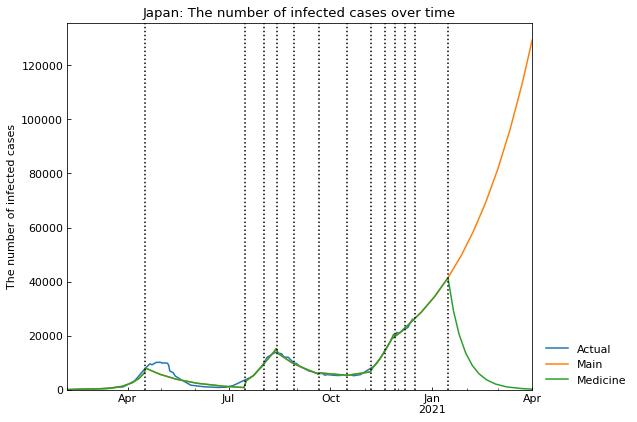

In [25]:
_ = snl.history(target="Infected")

### Change rate of parameters in main scenario
History of each parameter will be shown. Values will be divided by the values in 0th phase.

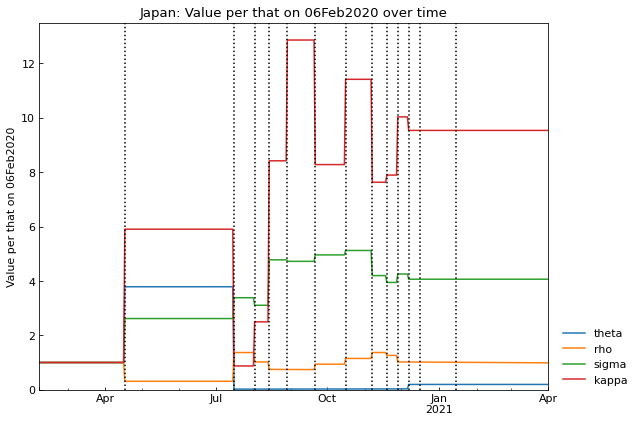

In [26]:
_ = snl.history_rate(name="Main")

## Retrospective analysis
We can evaluate the impact of measures using past records. How many people were infected if the parameter values have not changed sinse 01Sep2020?

In [27]:
# Perform retrospective analysis
snl_retro = cs.Scenario(jhu_data, population_data, "Japan")
snl_retro.retrospective("01Sep2020", model=cs.SIRF, control="Main", target="Retrospective")


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	 2nd phase (07Nov2020 - 18Nov2020): finished 2801 trials in 3 min  0 sec


	10th phase (29Aug2020 - 31Aug2020): finished  245 trials in 0 min 10 sec

	 4th phase (01Sep2020 - 20Sep2020): finished  270 trials in 0 min 10 sec

	 0th phase (06Feb2020 - 16Apr2020): finished 2583 trials in 3 min  0 sec

	 6th phase (17Apr2020 - 15Jul2020): finished 2556 trials in 3 min  0 sec

	12th phase (02Aug2020 - 13Aug2020): finished 2662 trials in 3 min  1 sec

	11th phase (07Dec2020 - 15Dec2020): finished  250 trials in 0 min 10 sec

	 7th phase (19Nov2020 - 27Nov2020): finished 2552 trials in 3 min  0 sec

	 1st phase (28Nov2020 - 06Dec2020): finished  445 trials in 0 min 20 sec

	 9th phase (14Aug2020 - 28Aug2020): finished  616 trials in 0 min 30 sec

	 5th phase (16Jul2020 - 01Aug2020): finished  398 trials in 0 min 20 sec

	 8th phase (21Sep2020 - 15Oct2020): finished  608 trials in 0 min 30 sec

	 3rd phase (16Oct2020 - 06Nov2020): finished 2780 trials in 3 min  0 sec

Completed optimization. Total: 9 min  4 sec



<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	 3rd phase (01Sep2020 - 15Dec2020): finished 9037 trials in 3 min  0 sec

Completed optimization. Total: 3 min  0 sec


In [28]:
# Show the summary of estimation
cols = ["Start", "End", "ODE", "Rt", *cs.SIRF.PARAMETERS] + ["RMSLE", "Trials", "Runtime"]
snl_retro.summary(columns=cols)

Start        End    ODE    Rt     theta     kappa  \
Scenario      Phase                                                          
Main          0th    06Feb2020  16Apr2020  SIR-F  4.80  0.021315  0.000112   
              1st    17Apr2020  15Jul2020  SIR-F  0.53  0.080691  0.000663   
              2nd    16Jul2020  01Aug2020  SIR-F  1.99  0.000432  0.000098   
              3rd    02Aug2020  13Aug2020  SIR-F  1.62  0.000208  0.000280   
              4th    14Aug2020  28Aug2020  SIR-F  0.82  0.001111  0.000821   
              5th    29Aug2020  31Aug2020  SIR-F  0.94  0.000977  0.001045   
              6th    01Sep2020  20Sep2020  SIR-F  0.77  0.000775  0.001432   
              7th    21Sep2020  15Oct2020  SIR-F  0.93  0.000068  0.001184   
              8th    16Oct2020  06Nov2020  SIR-F  1.09  0.000260  0.001282   
              9th    07Nov2020  18Nov2020  SIR-F  1.59  0.001183  0.000857   
              10th   19Nov2020  27Nov2020  SIR-F  1.56  0.000629  0.000886   
              11th   28Nov2020  06Dec2020  SIR-F  1.21  0.000719  0.001376   
              12th   07Dec2020  15Dec2020  SIR-F  1.18  0.004122  0.001071   
Retrospective 0th    06Feb2020  16Apr2020  SIR-F  4.80  0.021315  0.000112   
              1st    17Apr2020  15Jul2020  SIR-F  0.53  0.080691  0.000663   
              2nd    16Jul2020  01Aug2020  SIR-F  1.99  0.000432  0.000098   
              3rd    02Aug2020  13Aug2020  SIR-F  1.62  0.000208  0.000280   
              4th    14Aug2020  28Aug2020  SIR-F  0.82  0.001111  0.000821   
              5th    29Aug2020  31Aug2020  SIR-F  0.94  0.000977  0.001045   
              6th    01Sep2020  15Dec2020  SIR-F  0.94  0.000977  0.001045   

                          rho     sigma     RMSLE  Trials       Runtime  
Scenario      Phase                                                      
Main          0th    0.103006  0.020872  0.257967    2583  3 min  0 sec  
              1st    0.031904  0.054611  0.354081    2556  3 min  0 sec  
              2nd    0.140787  0.070585  0.025632     398  0 min 20 sec  
              3rd    0.105233  0.064798  0.040060    2662  3 min  1 sec  
              4th    0.080065  0.096317  0.014509     616  0 min 30 sec  
              5th    0.070793  0.074584  0.002829     245  0 min 10 sec  
              6th    0.077932  0.100348  0.019338     270  0 min 10 sec  
              7th    0.095755  0.101839  0.031939     608  0 min 30 sec  
              8th    0.118419  0.106840  0.033210    2780  3 min  0 sec  
              9th    0.140835  0.087562  0.010202    2801  3 min  0 sec  
              10th   0.129866  0.082304  0.022821    2552  3 min  0 sec  
              11th   0.104149  0.084986  0.011741     445  0 min 20 sec  
              12th   0.101709  0.084797  0.013388     250  0 min 10 sec  
Retrospective 0th    0.103006  0.020872  0.257967    2583  3 min  0 sec  
              1st    0.031904  0.054611  0.354081    2556  3 min  0 sec  
              2nd    0.140787  0.070585  0.025632     398  0 min 20 sec  
              3rd    0.105233  0.064798  0.040060    2662  3 min  1 sec  
              4th    0.080065  0.096317  0.014509     616  0 min 30 sec  
              5th    0.070793  0.074584  0.002829     245  0 min 10 sec  
              6th    0.070793  0.074584  0.408816    9037  3 min  0 sec

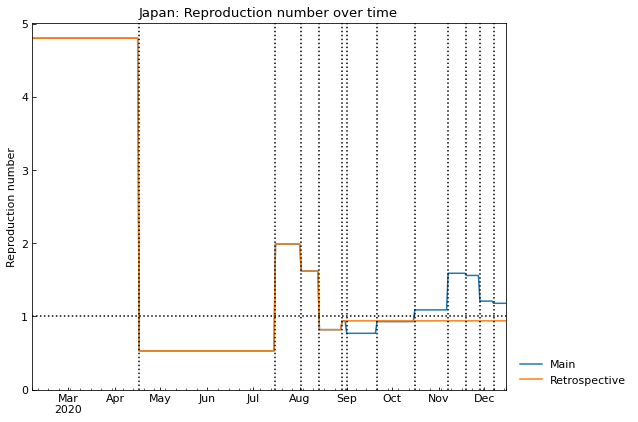

In [29]:
# History of reproduction number
_ = snl_retro.history("Rt")

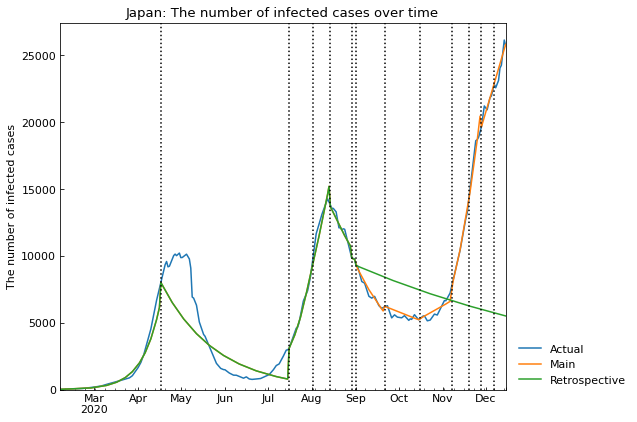

In [30]:
# History of Infected
_ = snl_retro.history("Infected")

In [31]:
# Show the representative values
snl_retro.describe()

,max(Infected),argmax(Infected),Confirmed on 16Dec2020,Infected on 16Dec2020,Fatal on 16Dec2020,6th_Rt,7th_Rt,8th_Rt,9th_Rt,10th_Rt,11th_Rt,12th_Rt
Main,26196,16Dec2020,184440,26196,2663,0.77,0.93,1.09,1.59,1.56,1.21,1.18
Retrospective,15189,13Aug2020,122482,5481,2148,0.94,-,-,-,-,-,-
